In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime  import datetime
warnings.filterwarnings('ignore')

In [158]:
data = pd.read_csv("cassandra.csv")
data
plt.style.use("ggplot")


In [159]:
# Extracting the data in hourly format to make it more readable
data['Iteration_Start_Hours'] = pd.to_datetime(data['IterationStartTime']).dt.hour
data['Iteration_End_Hours'] = pd.to_datetime(data['IterationEndTime']).dt.hour
data['grp_startTime'] = pd.to_datetime(data['grp_startTime']).dt.hour
data['IntertionTime'] = pd.to_datetime(data['IntertionTime']).dt.hour


In [160]:


data['IterationStartTime'] = pd.to_datetime(data['IterationStartTime'])
data['IterationEndTime'] = pd.to_datetime(data['IterationEndTime'])
data['grp_startTime'] = pd.to_datetime(data['grp_startTime'])
data['IntertionTime'] = pd.to_datetime(data['IntertionTime'])

data['Iteration_Start_Hours'] = data['IterationStartTime'].dt.hour
data['Iteration_End_Hours'] = data['IterationEndTime'].dt.hour
data['grp_startTime'] = data['grp_startTime'].dt.hour
data['IntertionTime'] = data['IntertionTime'].dt.hour




In [161]:
# Selecting the columns to be used for anomaly detection (IterationStartTime, IterationEndTime, value, BaseLine, grp_startTime, IntertionTime)
columns = ['IterationStartTime', 'IterationEndTime', 'value', 'BaseLine', 'grp_startTime', 'IntertionTime']
needed_data = data[columns]

In [162]:
for col in ['IterationStartTime', 'IterationEndTime', 'grp_startTime', 'IntertionTime']:
    needed_data[col] = pd.to_datetime(use_data[col]).astype('int64') // 10**9
# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination='auto', random_state=42) #we can change contamination as per our needs. 
model.fit(needed_data)
predictions = model.predict(needed_data)
exclude_columns = ['TestName', 'Metadata', 'MetricName', 'Grp_id']

data['Anomaly'] = predictions
anomalies = data[data['Anomaly'] == -1]

anomalies = anomalies.drop(columns=exclude_columns)
anomalies_str = anomalies.to_string(index=False)


print(anomalies_str)

 Unnamed: 0         IterationStartTime           IterationEndTime    value      BaseLine  grp_startTime  IntertionTime  Iteration_Start_Hours  Iteration_End_Hours  Anomaly
          0 2023-04-27 03:38:54.263752 2023-04-27 03:43:04.657833  20016.0  21533.339429              0              0                      3                    3       -1
          1 2023-04-27 03:55:31.765902 2023-04-27 03:59:45.787353  19399.0  21531.900000              0              0                      3                    3       -1
          2 2023-04-27 04:03:58.884879 2023-04-27 04:08:15.293151  19392.0  21534.071297              0              0                      4                    4       -1
          3 2023-04-27 04:21:02.864992 2023-04-27 04:25:23.498178  18862.0  21537.430033              0              0                      4                    4       -1
          4 2023-04-27 04:33:59.525730 2023-04-27 04:38:13.559396  19807.0  21535.071821              0              0                      

In [163]:
data['IterationEndTime'] = pd.to_datetime(data['IterationEndTime'], format='%Y-%m-%d %H:%M:%S.%f')

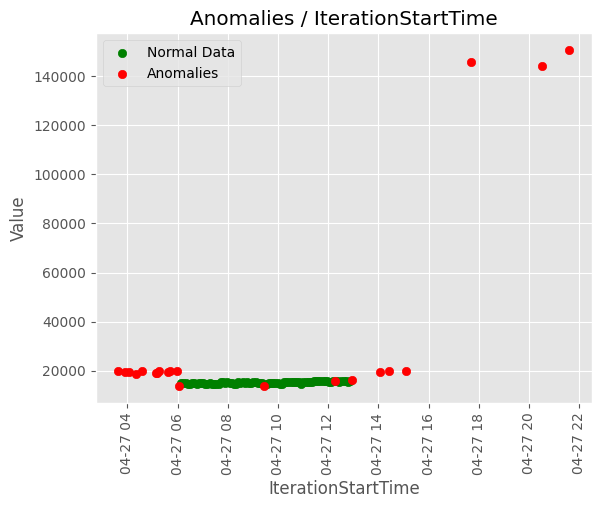

In [164]:
normal_data = data[data['Anomaly'] == 1]
anomalies = data[data['Anomaly'] == -1]
plt.scatter(normal_data['IterationStartTime'], normal_data['value'], label='Normal Data', color='g')
plt.scatter(anomalies['IterationStartTime'], anomalies['value'], label='Anomalies', color='r')
plt.xlabel('IterationStartTime')
plt.ylabel('Value')
plt.title('Anomalies / IterationStartTime')
plt.xticks(rotation=90)

plt.legend()


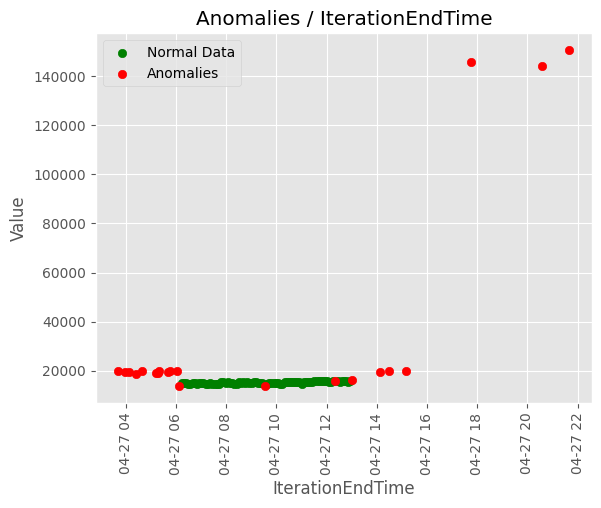

In [165]:
plt.scatter(normal_data['IterationEndTime'], normal_data['value'], label='Normal Data', color='g')
plt.scatter(anomalies['IterationEndTime'], anomalies['value'], label='Anomalies', color='r')
plt.xlabel('IterationEndTime')
plt.ylabel('Value')
plt.title('Anomalies / IterationEndTime')

plt.xticks(rotation=90)
plt.legend()


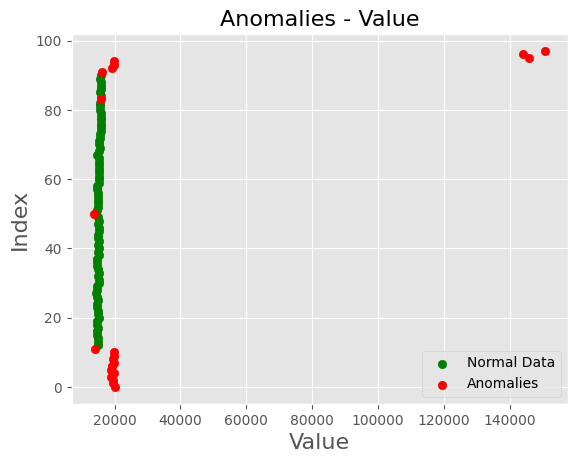

In [166]:
plt.scatter(normal_data['value'], normal_data.index, label='Normal Data', color='g')
plt.scatter(anomalies['value'], anomalies.index, label='Anomalies', color='r')
plt.xlabel('Value',fontsize="16")
plt.ylabel('Index',fontsize="16")
plt.title('Anomalies - Value',fontsize="16")
plt.legend()

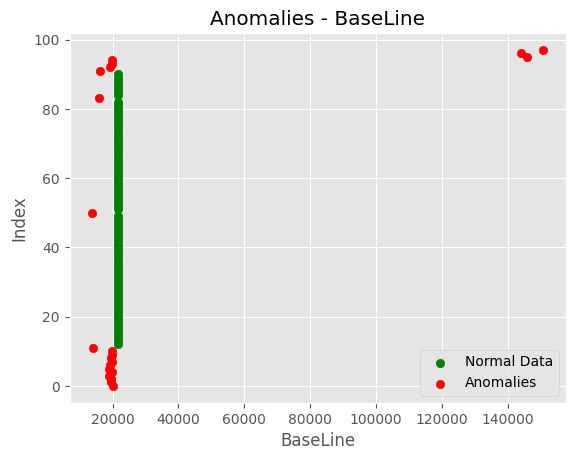

In [167]:
plt.scatter(normal_data['BaseLine'], normal_data.index, color='g', label='Normal Data')
plt.scatter(anomalies['value'], anomalies.index, label='Anomalies', color='r')
plt.xlabel('BaseLine')
plt.ylabel('Index')
plt.title('Anomalies - BaseLine')
plt.legend()

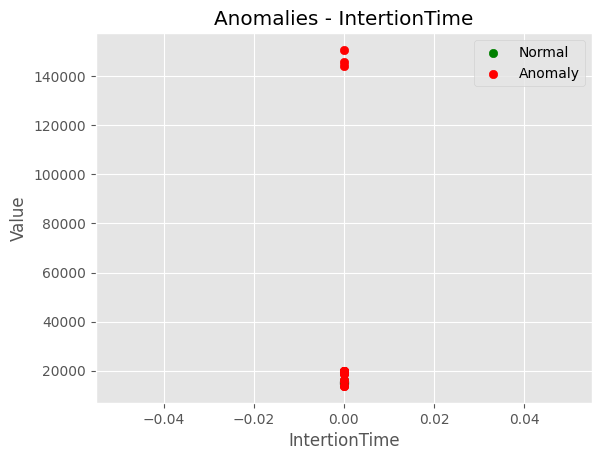

In [168]:
plt.scatter(data['IntertionTime'][data['Anomaly'] == 1], data['value'][data['Anomaly'] == 1], c='g', label='Normal')
# Plot anomaly data points
plt.scatter(data['IntertionTime'][data['Anomaly'] == -1], data['value'][data['Anomaly'] == -1], c='r', label='Anomaly')
plt.xlabel('IntertionTime')
plt.ylabel('Value')
plt.title('Anomalies - IntertionTime')
plt.legend()